<a href="https://colab.research.google.com/github/adalbertii/Seci-konwolucyjne/blob/main/convolutional-test-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

input_image = plt.imread('wmi_png.png')


Input shape: (721, 633, 3)


In [2]:
print(f'Input shape: {input_image.shape}')

Input shape: (721, 633, 3)


In [3]:
gray_image = rgb2gray(input_image)
small_image = gray_image[::2,::2]

In [4]:
from scipy.signal import convolve2d

def apply_kernel_to_image(img, kernel, title=''):

    feature = convolve2d(img, kernel, boundary='symm', mode='same')

    # Plot
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(img, 'gray')
    ax1.set_title('Input image', fontsize=15)
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(feature, 'gray')
    ax2.set_title(f'Feature map - {title}', fontsize=15)
    ax2.set_xticks([])
    ax2.set_yticks([])
    plt.show()

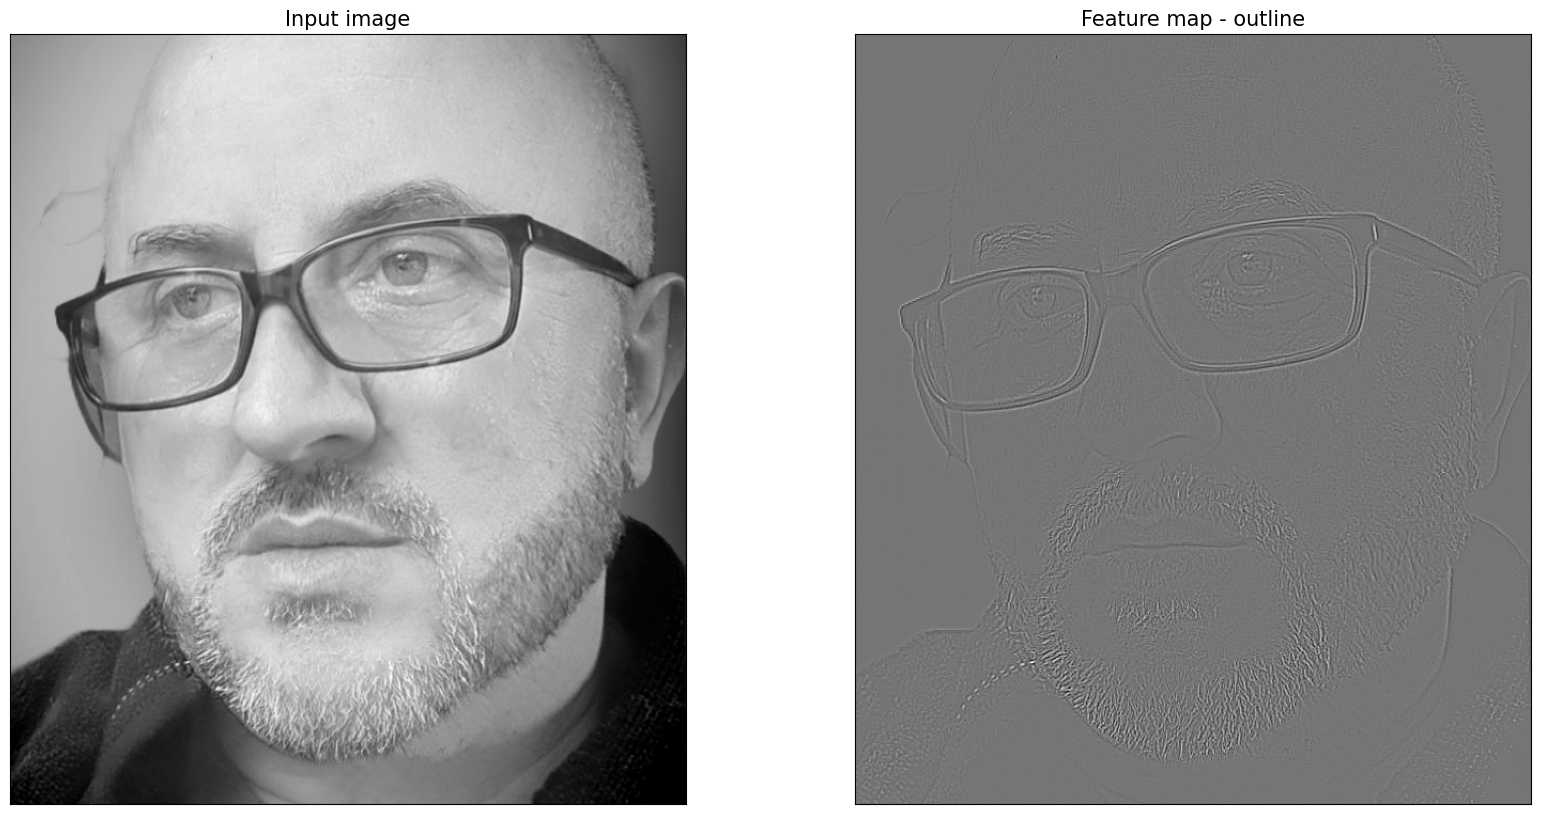

In [5]:
#outline
kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]])

apply_kernel_to_image(gray_image, kernel, 'outline')

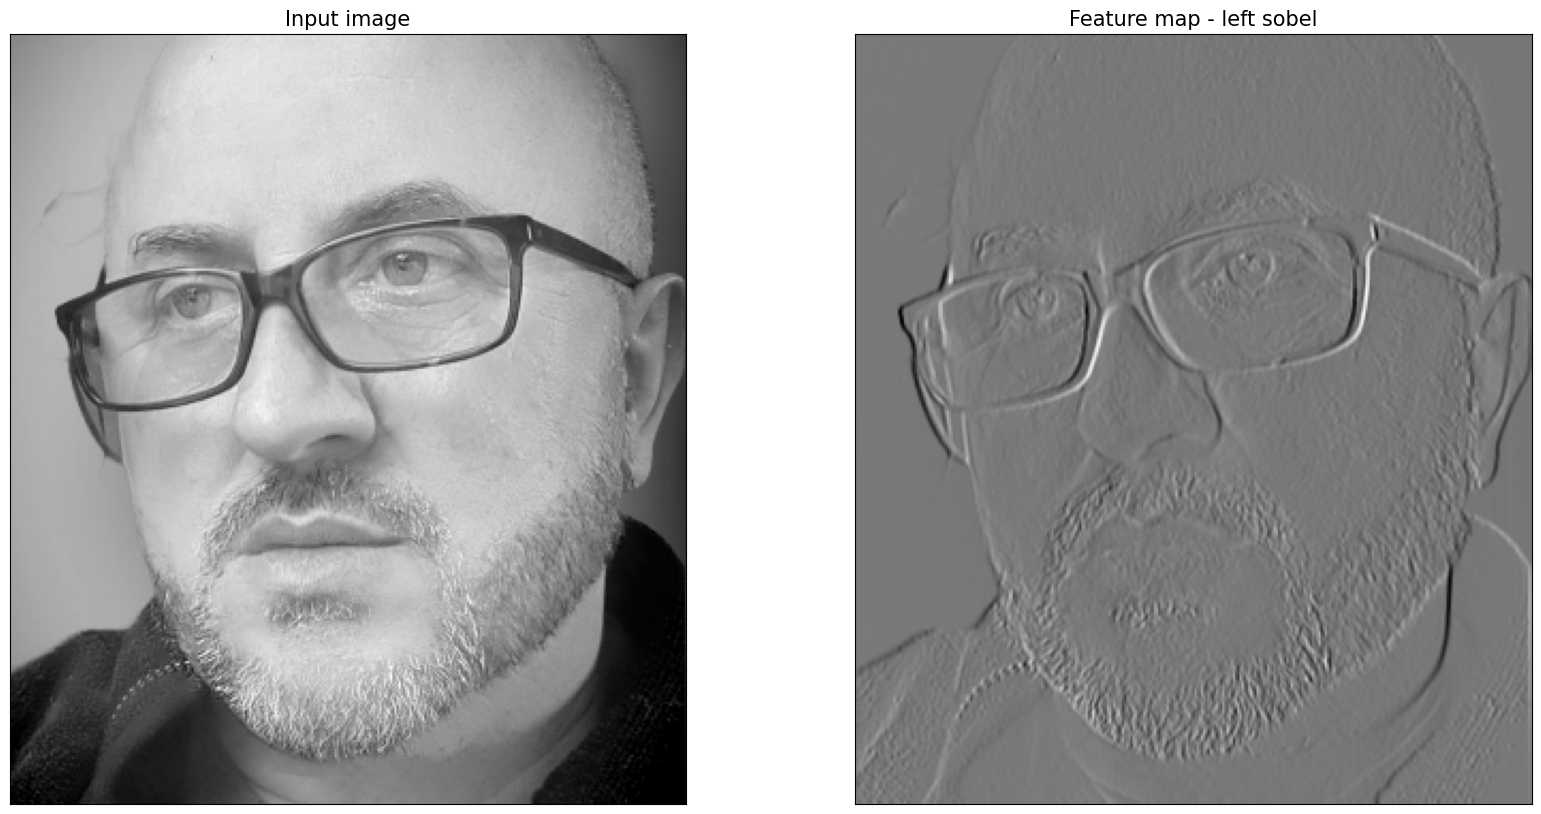

In [7]:
#left sobel
kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

apply_kernel_to_image(small_image, kernel, 'left sobel')

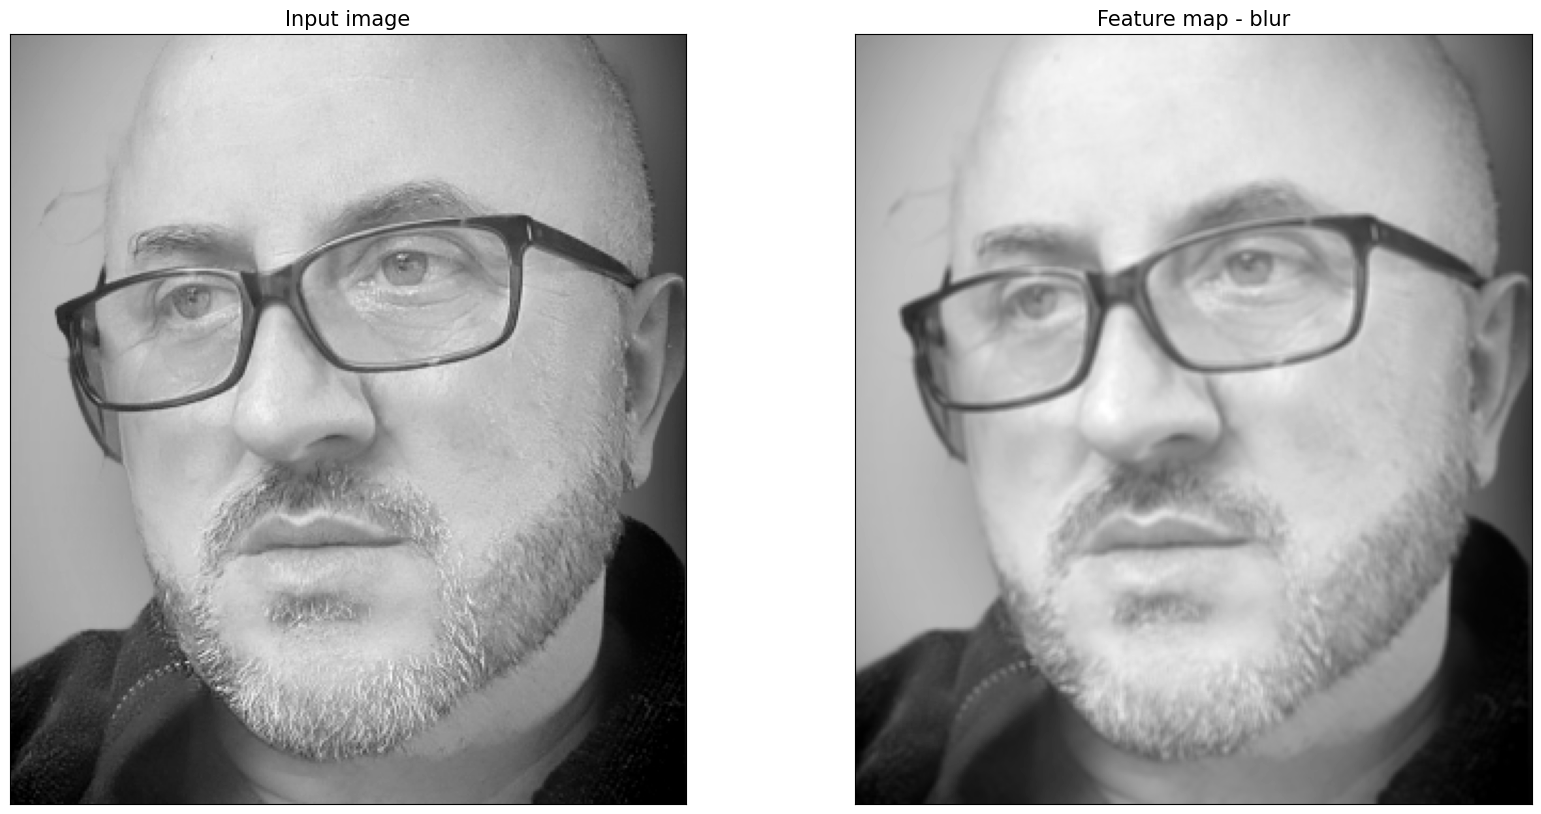

In [8]:
#blur
kernel = np.array([
    [0.01, 0.01, 0.01],
    [0.01, 0.01, 0.01],
    [0.01, 0.01, 0.01]])

apply_kernel_to_image(small_image, kernel, 'blur')

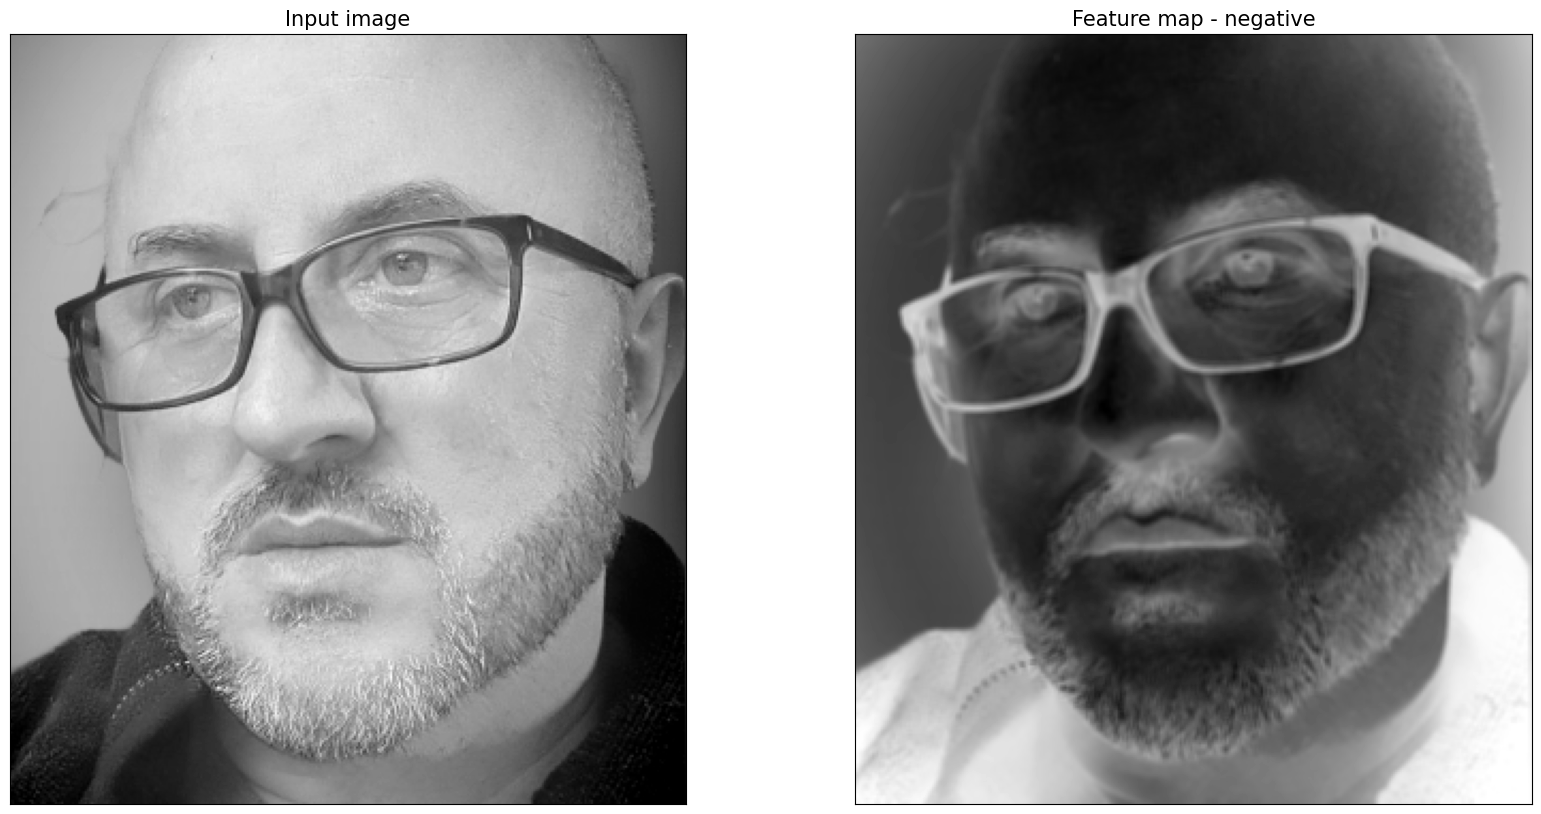

In [9]:
#negative
kernel = np.array([
    [-1, -1, -1],
    [-1, -1, -1],
    [-1, -1, -1]])

apply_kernel_to_image(small_image, kernel, 'negative')

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

print(f'tensorflow version: {tf.__version__}')

#wczytanie danych
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

print(f'Zbiór uczący: {X_train.shape}, zbiór testowy: {X_val.shape}, zbiór walidacyjny: {X_val.shape}')

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

tensorflow version: 2.13.0
4422102/4422102 [==============================] - 0s 0us/step
Zbiór uczący: (45000, 28, 28), zbiór testowy: (10000, 28, 28), zbiór walidacyjny: (10000, 28, 28)


In [11]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, add, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [12]:
def draw_curves(history, key1='accuracy', ylim1=(0.7, 1.00),
                key2='loss', ylim2=(0.0, 0.6)):
    plt.figure(figsize=(12,4))
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'test'], loc='best')

    plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 [==============================] - 9s 6ms/step - loss: 0.5276 - accuracy: 0.8146 - val_loss: 0.4516 - val_accuracy: 0.8303
Epoch 2/100
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3922 - accuracy: 0.8600 - val_loss: 0.3837 - val_accuracy: 0.8629
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3534 - accuracy: 0.8727 - val_loss: 0.3991 - val_accuracy: 0.8452
Epoch 4/100
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3257 - accuracy: 0.8803 - val_loss: 0.3413 - val_accuracy: 0.8771
Epoch 5/100
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3039 - accuracy: 0.8880 - val_loss: 0.3316 - val_accuracy: 0.8776
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2873 - accuracy: 0.8926 - val_loss: 0.3156 - val_accuracy: 0.8840
Epoch 7/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2751 - accuracy: 0.8968 - val_loss: 0.3277 - val_accuracy: 0.88

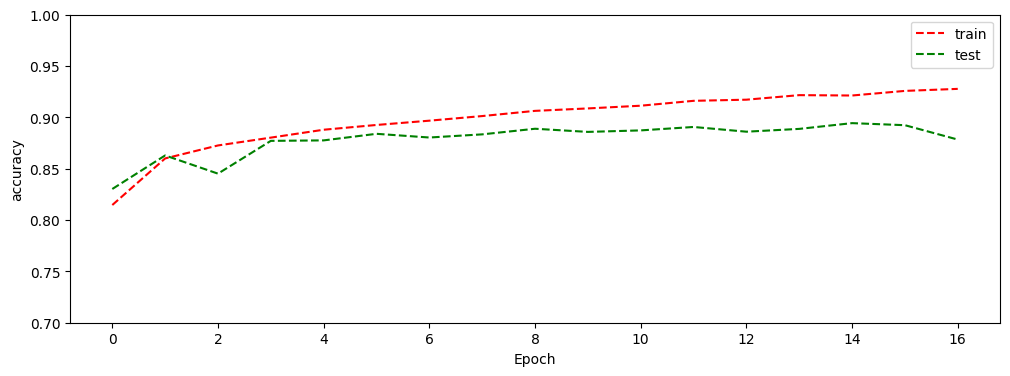

CNN Error: 13.12%


In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

EarlyStop = EarlyStopping(monitor='val_loss',
                          patience=5,
                          verbose=1)

history = model.fit(X_train, y_train,
                    epochs=100, verbose=1,
                    validation_data = (X_test, y_test),
                    callbacks = [EarlyStop],
                   )

draw_curves(history, key1='accuracy', key2='loss')

score = model.evaluate(X_val, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-score[1]*100))

In [14]:

from tensorflow.keras.layers import Conv2D, MaxPool2D

In [15]:
2# w przypadku CNN należy dodać jeszcze info o kanałach
X_train_cnn = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_val_cnn = X_val.reshape((X_val.shape[0], 28, 28, 1))

In [16]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [17]:
history = model.fit(X_train_cnn,
                    y_train,
                    epochs=100,
                    verbose=1,
                    validation_data = (X_test_cnn, y_test),
                    callbacks = [EarlyStop],
                   )

draw_curves(history, key1='accuracy', key2='loss')

score = model.evaluate(X_val_cnn, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-score[1]*100))

Epoch 1/100
1407/1407 [==============================] - 68s 48ms/step - loss: 0.4031 - accuracy: 0.8565 - val_loss: 0.3088 - val_accuracy: 0.8891
Epoch 2/100
1407/1407 [==============================] - 66s 47ms/step - loss: 0.2761 - accuracy: 0.8993 - val_loss: 0.2913 - val_accuracy: 0.8976
Epoch 3/100
1407/1407 [==============================] - 68s 48ms/step - loss: 0.2342 - accuracy: 0.9131 - val_loss: 0.2721 - val_accuracy: 0.8979
Epoch 4/100
1407/1407 [==============================] - 69s 49ms/step - loss: 0.2010 - accuracy: 0.9238 - val_loss: 0.2517 - val_accuracy: 0.9082
Epoch 5/100
1407/1407 [==============================] - 70s 50ms/step - loss: 0.1764 - accuracy: 0.9337 - val_loss: 0.2473 - val_accuracy: 0.9120
Epoch 6/100
1407/1407 [==============================] - 71s 50ms/step - loss: 0.1539 - accuracy: 0.9418 - val_loss: 0.2577 - val_accuracy: 0.9143
Epoch 7/100
1407/1407 [==============================] - 70s 50ms/step - loss: 0.1356 - accuracy: 0.9491 - val_loss: 0

KeyboardInterrupt: ignored

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(X_train_cnn,
                    y_train,
                    epochs=100,
                    verbose=1,
                    validation_data = (X_test_cnn, y_test),
                    callbacks = [EarlyStop],
                   )

draw_curves(history, key1='accuracy')

score = model.evaluate(X_val_cnn, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-score[1]*100))

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(X_train_cnn,
                    y_train,
                    epochs=100,
                    verbose=1,
                    validation_data = (X_test_cnn, y_test),
                    callbacks = [EarlyStop],
                   )

draw_curves(history, key1='accuracy')

score = model.evaluate(X_val_cnn, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-score[1]*100))